# Community Detection on Youtube and Twitch

In [1]:
import snap
import numpy as np 
from matplotlib import pyplot as plt
import networkx as nx
# !pip3 install python-louvain
import pandas as pd
import networkx as nx
import community
import matplotlib.colors as mcolors

In [2]:
# TODO : use networkx to read dataset normally like in the hw 
# instead of using pandas its running slow as ds is big

G = nx.read_edgelist("Dataset/youtube.txt", nodetype = int)
G.name = 'Youtube User-User Network'
print(nx.info(G))


Name: Youtube User-User Network
Type: Graph
Number of nodes: 1138499
Number of edges: 2990443
Average degree:   5.2533


Name: Youtube User-User Network
Type: Graph
Number of nodes: 6982
Number of edges: 64996
Average degree:  18.6182


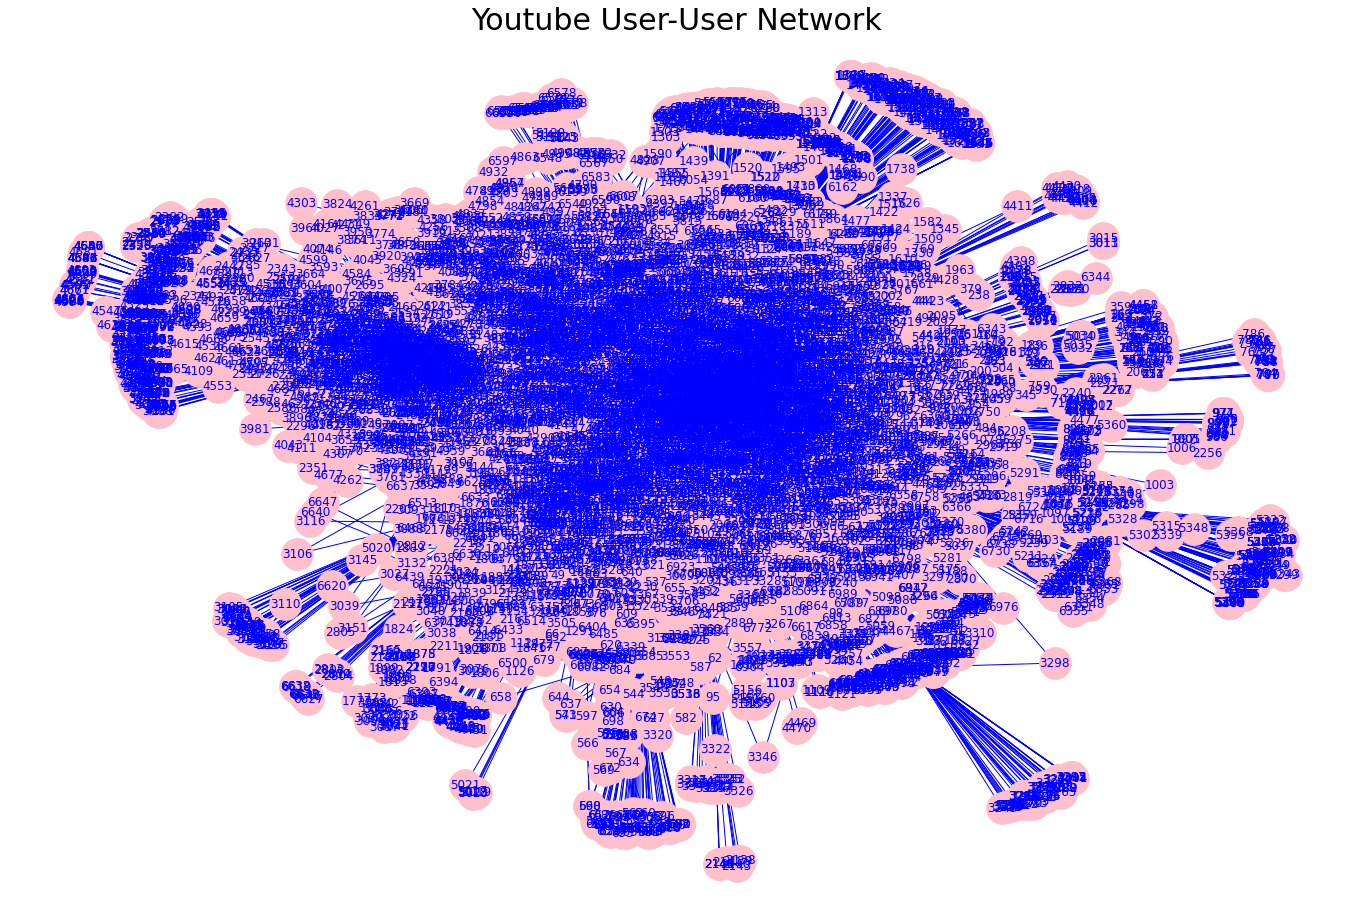

In [3]:
edgeList=[]
for node in range(1,7001):
    for i in G.edges(node):
        if i[0] < 7001 and i[1] < 7001:
            if len(G.edges(node)) > 10:
                edgeList.append(i)

newGraph = nx.Graph()
newGraph.add_edges_from(edgeList)
newGraph.name = 'Youtube User-User Network'
newGraph.remove_nodes_from(nx.isolates(newGraph))
print(nx.info(newGraph))
position = nx.spring_layout(newGraph)
plt.figure(figsize=(24,16))
nx.draw_networkx(newGraph, 
                 position, 
                 with_labels=True, 
                 font_weight='normal', 
                 node_size=1000,
                 arrows=True,
                 node_color='pink',
                 font_color='blue',
                 edge_color='blue')
plt.title(newGraph.name, size=30)
plt.axis('off')
plt.show()


In [5]:
def graph_drawing_with_label(graph_database, position, algorithm, algorithm_name):
    plt.figure(figsize=(24,16))
    nx.draw_networkx(graph_database, 
                     position, 
                     node_size=1000, 
                     with_labels=True,
                     font_weight='normal',
                     cmap=plt.get_cmap('cool'), 
                     arrows=True,
                     edge_color='gray',
                     node_color=list(algorithm.values()),
                     nodelist=list(algorithm.keys()))
    plt.title(algorithm_name, size=30)
    plt.axis('off')
    plt.show()
    
def graph_drawing_without_label(graph_database, position, algorithm, algorithm_name):
    plt.figure(figsize=(24,16))
    nx.draw_networkx(graph_database, 
                     position, 
                     node_size=1000, 
                     with_labels=False,
                     font_weight='normal',
                     cmap=plt.get_cmap('cool'), 
                     arrows=True,
                     edge_color='gray',
                     node_color=list(algorithm.values()),
                     nodelist=list(algorithm.keys()))
    plt.title(algorithm_name, size=30)
    plt.axis('off')
    plt.show()


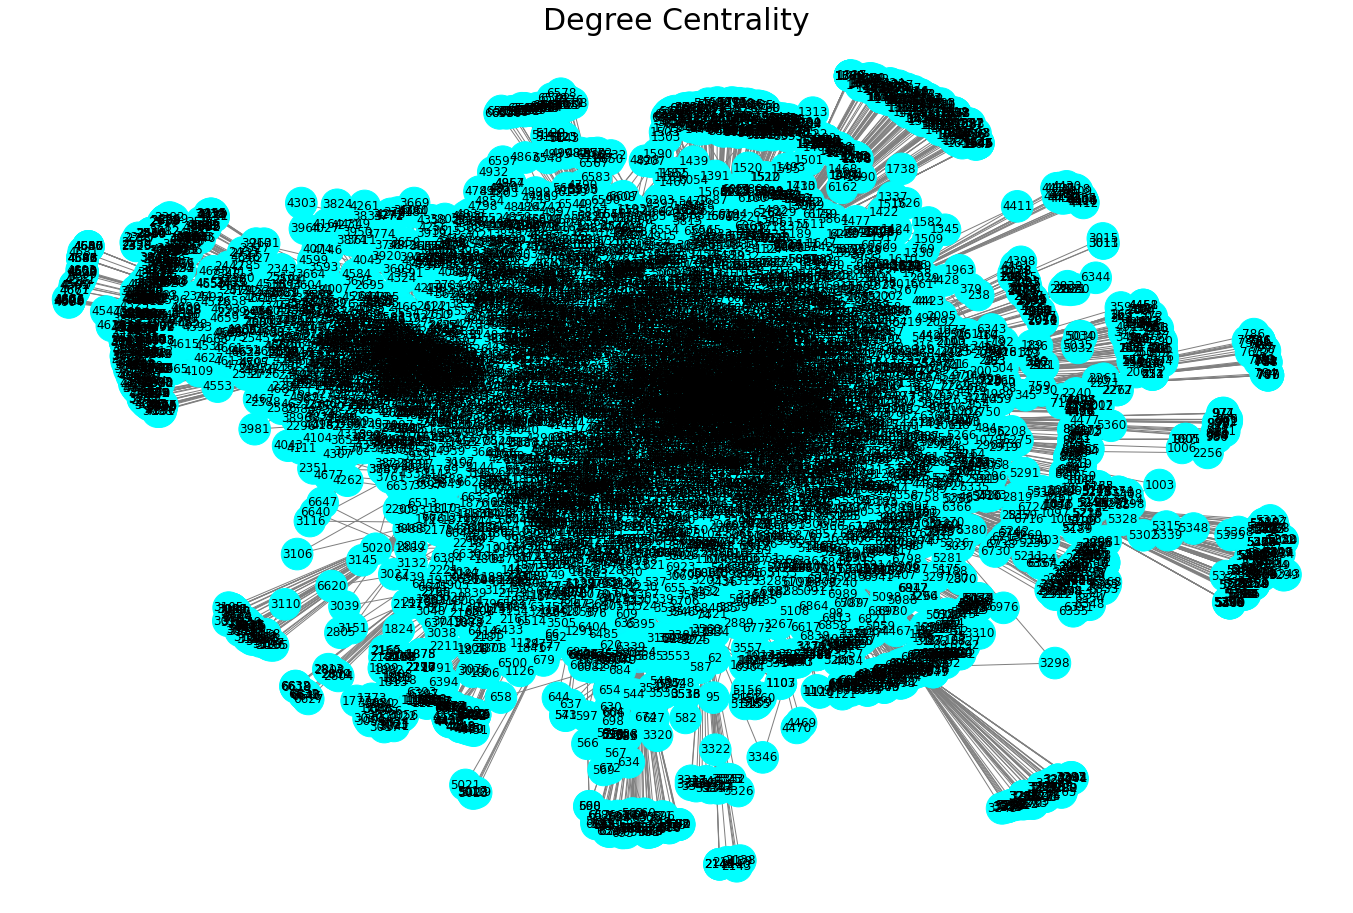

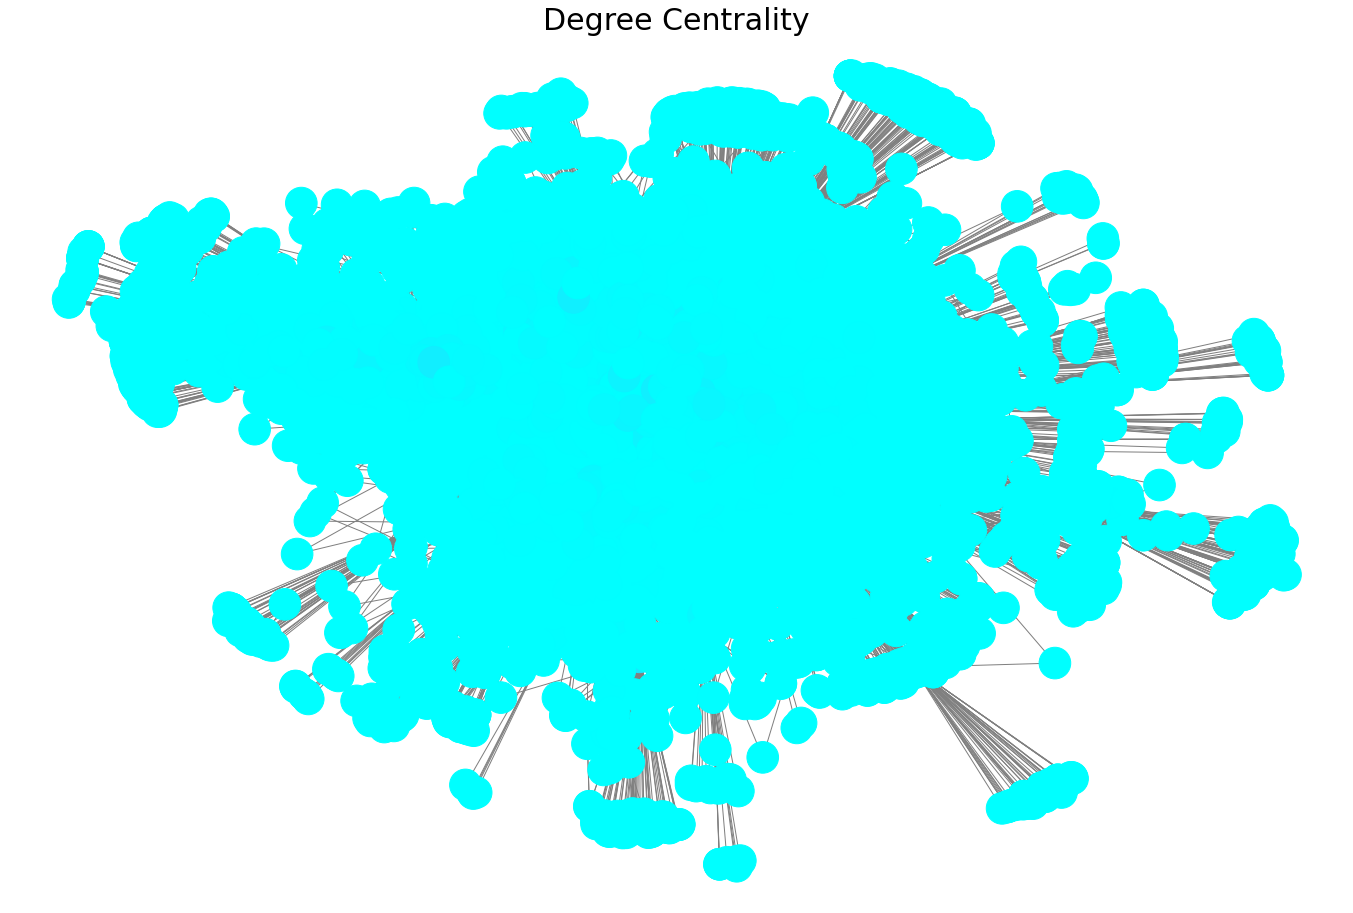

In [6]:
# 'Degree Centrality'
graph_drawing_with_label(newGraph, position, nx.degree_centrality(newGraph), 'Degree Centrality')
graph_drawing_without_label(newGraph, position, nx.degree_centrality(newGraph), 'Degree Centrality')

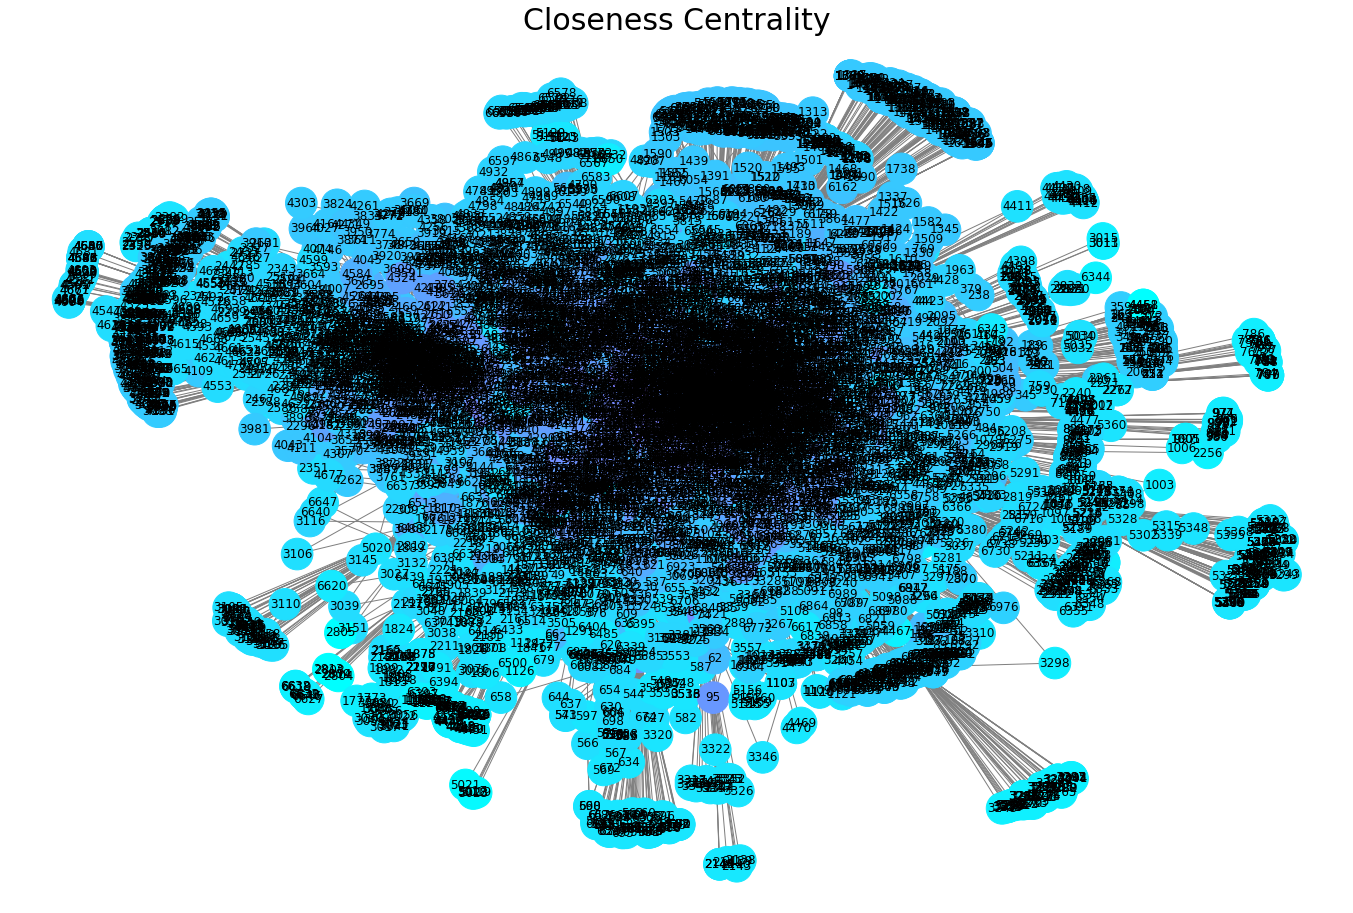

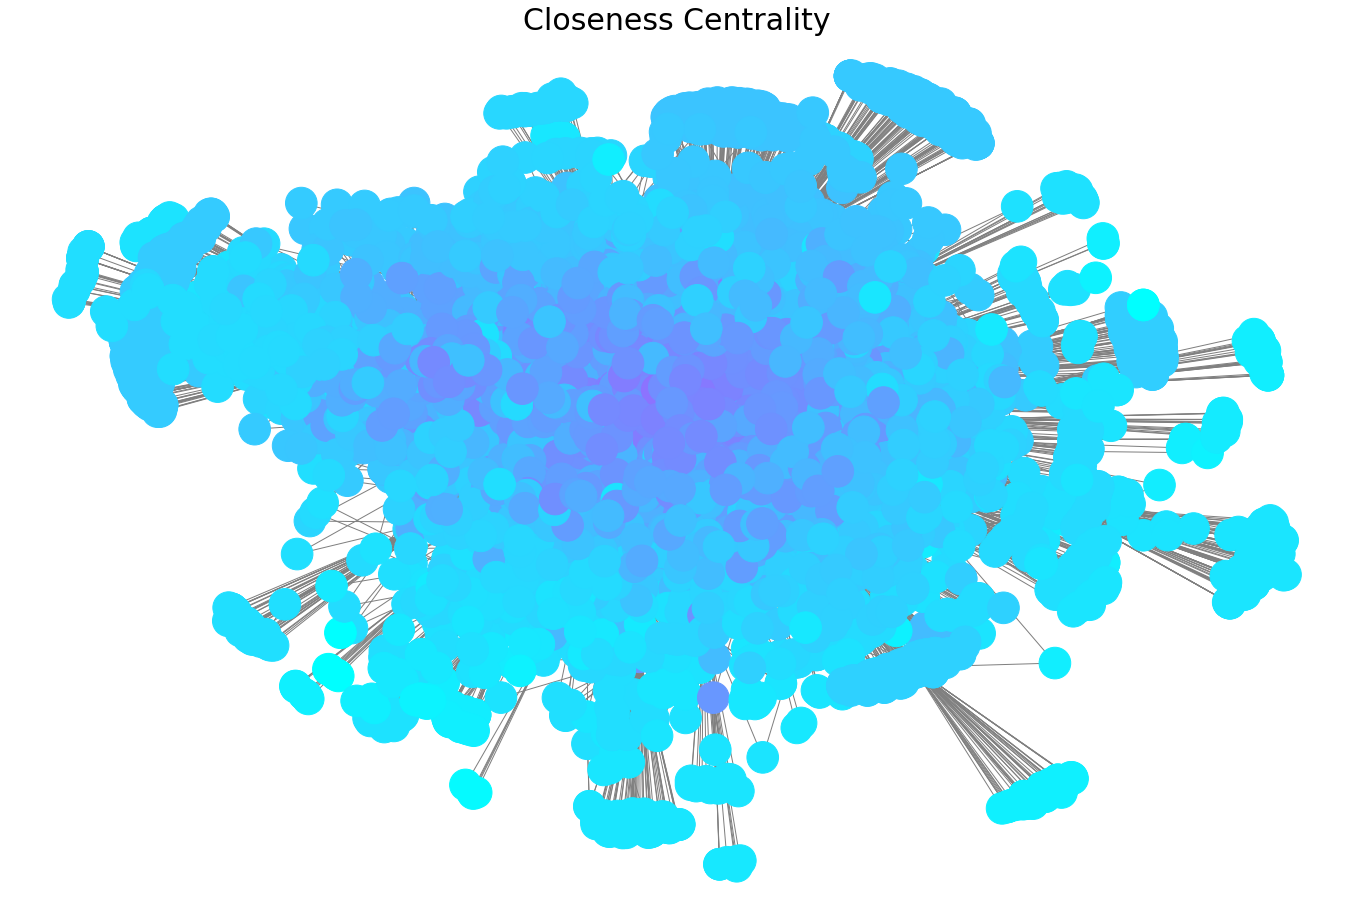

In [7]:
# 'Closeness Centrality'
graph_drawing_with_label(newGraph, position, nx.closeness_centrality(newGraph), 'Closeness Centrality')
graph_drawing_without_label(newGraph, position, nx.closeness_centrality(newGraph), 'Closeness Centrality')

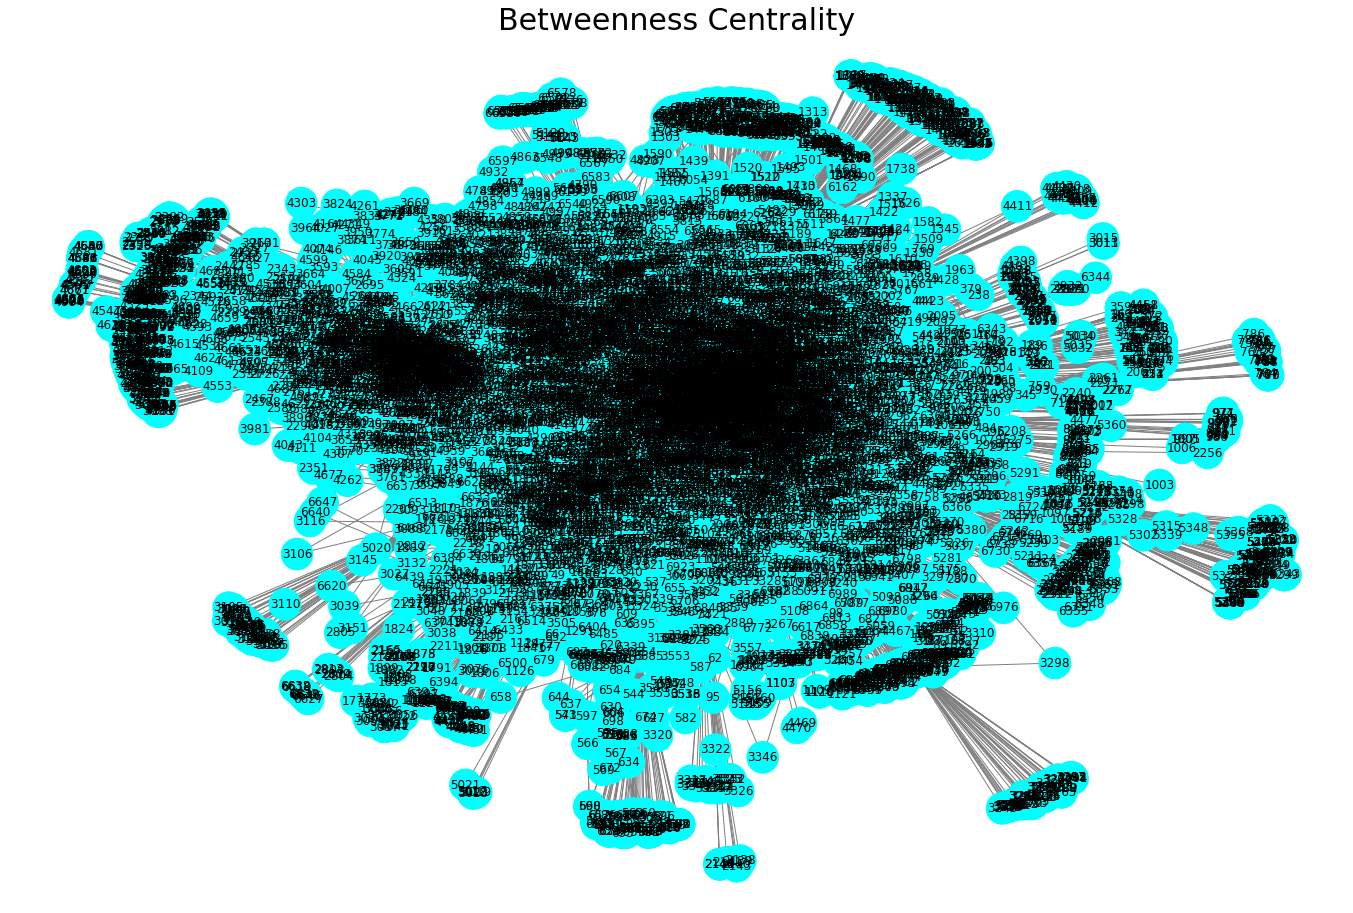

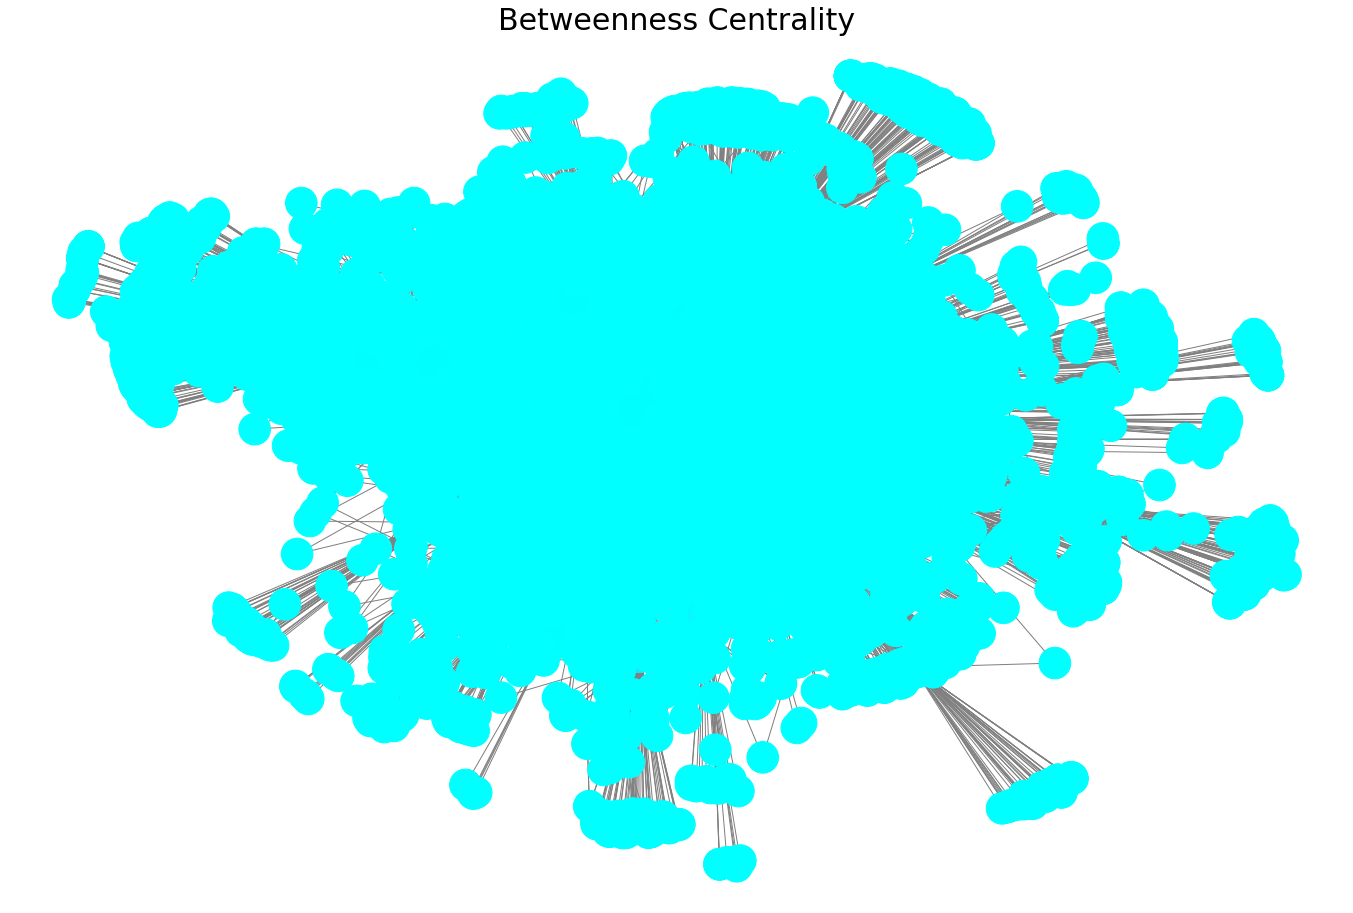

In [8]:
# 'Betweenness Centrality'
graph_drawing_with_label(newGraph, position, nx.betweenness_centrality(newGraph), 'Betweenness Centrality')
graph_drawing_without_label(newGraph, position, nx.betweenness_centrality(newGraph), 'Betweenness Centrality')

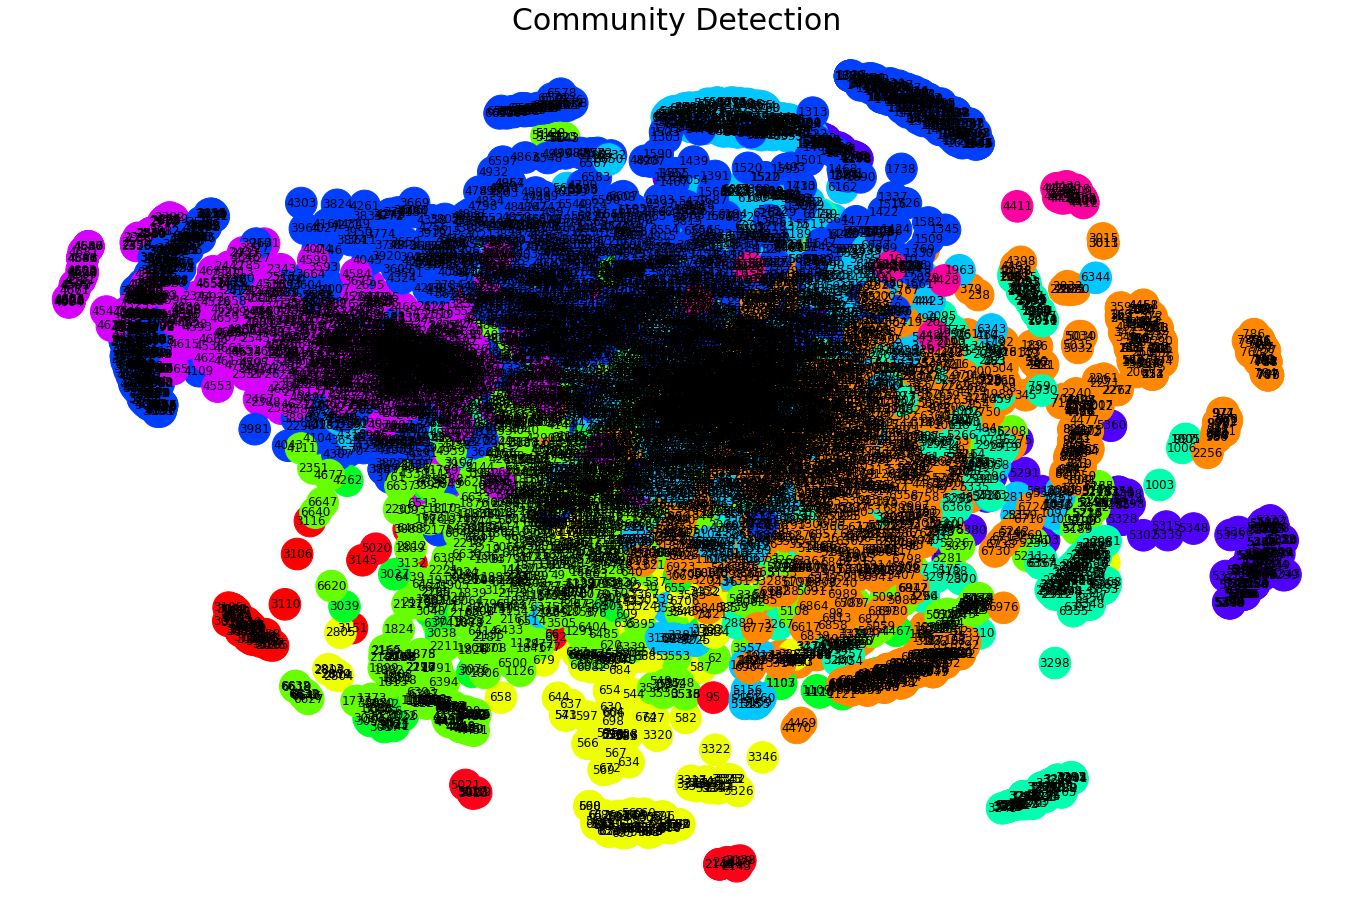

In [9]:
partition = community.best_partition(newGraph, random_state=1992)
values = [partition.get(node) for node in newGraph.nodes()]
plt.figure(figsize=(24,16))
nx.draw_networkx(newGraph,
                 position,
                 cmap=plt.get_cmap('hsv'),
                 arrows=True,
                 node_color=values, 
                 edge_color='white',
                 node_size=1000, 
                 with_labels=True, 
                 font_weight='normal')
plt.title('Community Detection', size=30)
plt.axis('off')
plt.show()